In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas_datareader.data as pdr
from datetime import datetime,timedelta

start = datetime(2018 , 7,1)
end = datetime(2020, 7,1)

df = pdr.DataReader( 'PVR.NS','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-07-02,1382.849976,1352.099976,1378.000000,1366.199951,228003.0,1357.896606
2018-07-03,1394.900024,1352.349976,1362.000000,1376.400024,159516.0,1368.034912
2018-07-04,1398.949951,1370.150024,1371.900024,1378.349976,108849.0,1369.972778
2018-07-05,1387.250000,1368.000000,1379.000000,1376.650024,131782.0,1368.283203
2018-07-06,1387.650024,1365.000000,1371.500000,1371.500000,118375.0,1363.164551


In [3]:
df['Returns'] = df.Close.pct_change()

daily_mean = df['Returns'].mean()
daily_std = df['Returns'].std()

annual_mean = daily_mean * 252
annual_std = daily_std * np.sqrt(252)

volatality = annual_std

print('Annual Mean',round(annual_mean,2))
print('Annual std',round(annual_std,2))
print('Volatality',volatality)

Annual Mean -0.07
Annual std 0.45
Volatality 0.4504940211671151


In [4]:
df2 = pdr.DataReader(['CIPLA.NS','SUNPHARMA.NS','SMSPHARMA.NS','DRREDDY.NS','FORTIS.NS'],'yahoo',start,end)
df3 = df2['Close']
df3.head()

Symbols,CIPLA.NS,DRREDDY.NS,FORTIS.NS,SMSPHARMA.NS,SUNPHARMA.NS
Date,,,,,
2018-07-02,617.000000,2240.350098,133.649994,68.250000,563.150024
2018-07-03,640.400024,2273.750000,142.100006,69.849998,573.599976
2018-07-04,628.900024,2317.250000,144.399994,68.349998,579.299988
2018-07-05,626.549988,2298.649902,139.399994,73.400002,566.950012
2018-07-06,612.500000,2269.050049,138.500000,71.800003,558.099976


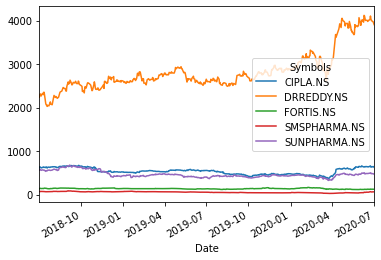

In [5]:
df3.plot()

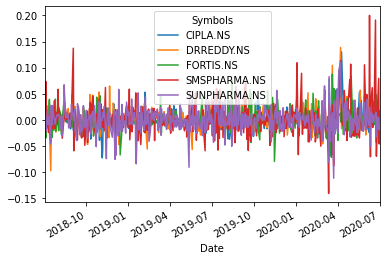

In [6]:
returns = df3.pct_change()
returns.dropna(inplace=True)
returns.plot()

In [7]:
mean_returns = returns.mean()
std_returns = returns.std()
cov = returns.cov()

cov

Symbols,CIPLA.NS,DRREDDY.NS,FORTIS.NS,SMSPHARMA.NS,SUNPHARMA.NS
Symbols,,,,,
CIPLA.NS,0.000384,0.000146,0.000072,0.000182,0.000217
DRREDDY.NS,0.000146,0.000377,0.000088,0.000165,0.000198
FORTIS.NS,0.000072,0.000088,0.000371,0.000087,0.000087
SMSPHARMA.NS,0.000182,0.000165,0.000087,0.000958,0.000215
SUNPHARMA.NS,0.000217,0.000198,0.000087,0.000215,0.000548


In [8]:
mean_returns

Symbols
CIPLA.NS        0.000222
DRREDDY.NS      0.001334
FORTIS.NS       0.000007
SMSPHARMA.NS    0.000312
SUNPHARMA.NS   -0.000106
dtype: float64

In [9]:
weights = np.array([0.2,0.2,0.2,0.2,0.2])
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [10]:
portfolio_annual_returns = np.sum(mean_returns * weights) * 252
portfolio_std = (np.sqrt(np.dot(weights,np.dot(cov , weights))) * np.sqrt(252))

print("Annual return :" + str(portfolio_annual_returns))
print("Volatility: " + str(portfolio_std))

Annual return :0.08916439506763774
Volatility: 0.2365714574604358


In [11]:
runs = 25000
result = np.zeros((3,runs))

for i in range(runs):
  weights = np.random.random(5)
  weights /= np.sum(weights)

  portfolio_annual_returns = (np.sum(mean_returns * weights) * 252)
  portfolio_std = (np.sqrt(np.dot(weights,np.dot(cov,weights))) * np.sqrt(252))

  result[0,i] = portfolio_annual_returns
  result[1,i] = portfolio_std

  result[2,i] = result[0,i] / result[1,i]

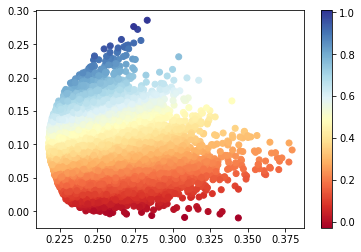

In [12]:
results_frame = pd.DataFrame(result.T,columns=['ret','stdev','sharpe'])

plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()

In [13]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

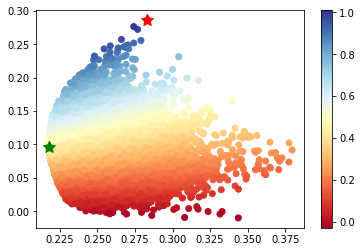

In [14]:
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=150)
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=150)